In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from rasterio.warp import reproject, Resampling
from rasterio.enums import Resampling

In [56]:
#from rasterio import features
with rasterio.open('out_raster/classified/vari_classes.tif') as dataset:
    vari = dataset.read(1).astype(np.float32)
    meta = dataset.meta

(array([9088681.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,  218171.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  361617.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0., 

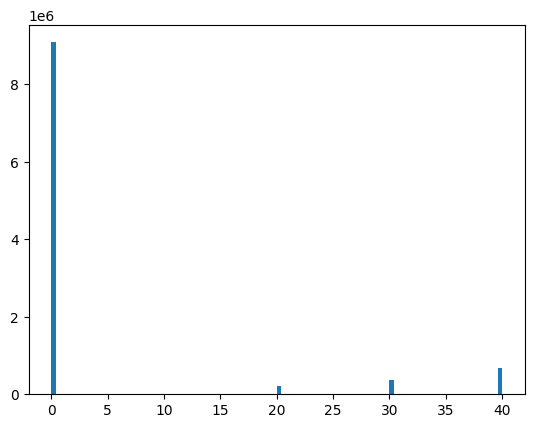

In [32]:
plt.hist(vari.flatten(), bins=100)

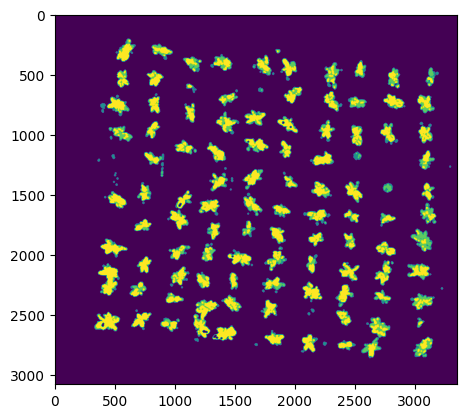

In [33]:
plt.imshow(vari)

In [65]:
# Example usage:
output_raster_path = 'out_raster/resample/exg_resample_bilinear.tif'
target_resolution = 1  # Set the desired target resolution

In [66]:
with rasterio.open('out_raster/classified/exg_classes.tif') as src:
        # Read the raster data
    raster_data = src.read(1)

        # Get the metadata of the input raster
    meta = src.meta.copy()

    # Calculate the new dimensions based on the target resolution
    new_height = int(src.height * src.res[0] / target_resolution)
    new_width = int(src.width * src.res[1] / target_resolution)
    print(new_height, new_width)

        # Perform spatial interpolation using bilinear resampling
    interpolated_data = np.empty((new_height, new_width), dtype=raster_data.dtype)
    rasterio.warp.reproject(
            source=raster_data,
            destination=interpolated_data,
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=src.transform * src.transform.scale(
                (src.width / new_width), (src.height / new_height)
            ),
            dst_crs=src.crs,
            resampling=Resampling.bilinear
    )

        # Update metadata with new dimensions and resolution
    meta.update({
            'width': new_width,
            'height': new_height,
            'transform': src.transform * src.transform.scale(
                (src.width / new_width), (src.height / new_height)
            ),
            'res': (target_resolution, target_resolution)
        })


28 31


(array([490., 114.,  77.,  55.,  42.,  39.,  27.,  12.,  10.,   2.]),
 array([ 0.        ,  2.50257587,  5.00515175,  7.50772762, 10.0103035 ,
        12.51287937, 15.01545525, 17.51803207, 20.02060699, 22.52318192,
        25.02575874]),
 <BarContainer object of 10 artists>)

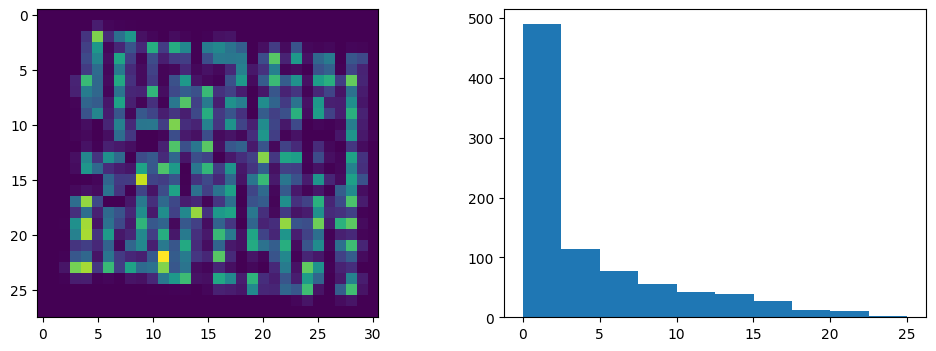

In [67]:
fig, (a1, a2) = plt.subplots(1,2, figsize=(12,4))
a1.imshow(interpolated_data)
a2.hist(interpolated_data.flatten())

In [68]:
        # Write the interpolated raster to the output file
with rasterio.open(output_raster_path, 'w', **meta) as dst:
    dst.write(interpolated_data, 1)